In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('../Warangal.csv')
print(df.shape)
df

(84, 4)


,Date,PM10,NOx,SO2
0,01-01-2016,76,26.0,7.0
1,01-02-2016,72,19.0,7.0
2,01-03-2016,63,21.8,7.1
3,01-04-2016,73,20.0,7.0
4,01-05-2016,84,19.0,8.0
...,...,...,...,...
79,01-08-2022,56,26.6,6.5
80,01-09-2022,48,29.9,7.1
81,01-10-2022,63,32.2,7.9
82,01-11-2022,95,35.0,7.6


In [ ]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15))

69   2021-01-10
70   2021-01-11
71   2021-01-12
72   2022-01-01
73   2022-01-02
74   2022-01-03
75   2022-01-04
76   2022-01-05
77   2022-01-06
78   2022-01-07
79   2022-01-08
80   2022-01-09
81   2022-01-10
82   2022-01-11
83   2022-01-12
Name: Date, dtype: datetime64[ns]


In [ ]:
cols = list(df)[1:4]
print(cols)

['PM10', 'NOx', 'SO2']


<AxesSubplot:>

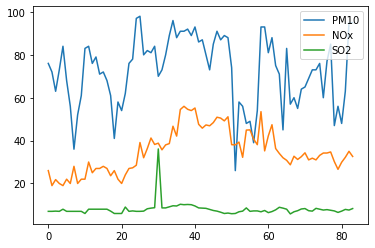

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.plot()

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training

,PM10,NOx,SO2
0,76.0,26.0,7.0
1,72.0,19.0,7.0
2,63.0,21.8,7.1
3,73.0,20.0,7.0
4,84.0,19.0,8.0
...,...,...,...
79,56.0,26.6,6.5
80,48.0,29.9,7.1
81,63.0,32.2,7.9
82,95.0,35.0,7.6


In [ ]:
n_future = 12
n_past = 3

In [ ]:
trainX = []
trainYP = []
trainYN = []
trainYS = []

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainYP.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    trainYN.append(df_for_training_scaled[i + n_future - 1:i + n_future, 1])
    trainYS.append(df_for_training_scaled[i + n_future - 1:i + n_future, 2])

In [ ]:
trainX, trainYP, trainYN, trainYS = np.array(trainX), np.array(trainYP), np.array(trainYN), np.array(trainYS)
print('trainX shape == {}.'.format(trainX.shape))
print('trainYP shape == {}.'.format(trainYP.shape))
print('trainYN shape == {}.'.format(trainYN.shape))
print('trainYS shape == {}.'.format(trainYS.shape))

trainX shape == (70, 3, 3).
trainYP shape == (70, 1).
trainYN shape == (70, 1).
trainYS shape == (70, 1).


In [ ]:
modelP = Sequential()
modelP.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelP.add(LSTM(32, activation='relu', return_sequences=False))
modelP.add(Dropout(0.2))
modelP.add(Dense(trainYP.shape[1]))

In [ ]:
modelP.compile(optimizer='adam', loss='mse')
modelP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = modelP.fit(trainX, trainYP, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 245ms/step - loss: 0.9906 - val_loss: 1.5364
Epoch 2/200
4/4 [==============================] - 0s 37ms/step - loss: 0.9793 - val_loss: 1.5385
Epoch 3/200
4/4 [==============================] - 0s 24ms/step - loss: 0.9721 - val_loss: 1.5384
Epoch 4/200
4/4 [==============================] - 0s 22ms/step - loss: 0.9622 - val_loss: 1.5352
Epoch 5/200
4/4 [==============================] - 0s 30ms/step - loss: 0.9484 - val_loss: 1.5339
Epoch 6/200
4/4 [==============================] - 0s 50ms/step - loss: 0.9363 - val_loss: 1.5308
Epoch 7/200
4/4 [==============================] - 0s 38ms/step - loss: 0.9325 - val_loss: 1.5308
Epoch 8/200
4/4 [==============================] - 0s 53ms/step - loss: 0.9211 - val_loss: 1.5314
Epoch 9/200
4/4 [==============================] - 0s 52ms/step - loss: 0.9090 - val_loss: 1.5315
Epoch 10/200
4/4 [==============================] - 0s 45ms/step - loss: 0.8935 - val_loss: 1.5327
Epoch 11/200
4/4 [

In [ ]:
historyP = history

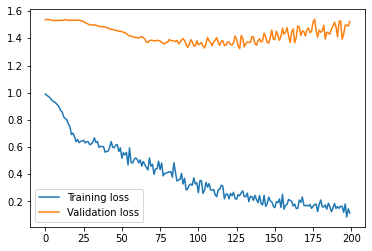

In [ ]:
plt.plot(historyP.history['loss'], label='Training loss')
plt.plot(historyP.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predict_period_dates = pd.date_range(start = '01-01-2023',periods=12, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M'), Timestamp('2023-12-31 00:00:00', freq='M')]


In [ ]:
predictionP = modelP.predict(trainX[:12])

1/1 [==============================] - 0s 21ms/step


In [ ]:
prediction_copiesP = np.repeat(predictionP, df_for_training.shape[1], axis=-1)
y_pred_futureP = scaler.inverse_transform(prediction_copiesP)[:,0]

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
df_forecastP = pd.DataFrame({'Date':np.array(forecast_dates), 'PM10':y_pred_futureP})
df_forecastP['Date']=pd.to_datetime(df_forecastP['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='PM10'>

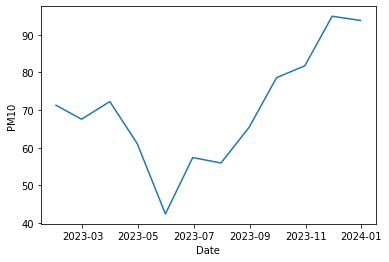

In [ ]:
sns.lineplot(df_forecastP['Date'], df_forecastP['PM10'])

In [ ]:
df_forecastP

,Date,PM10
0,2023-01-31,71.278244
1,2023-02-28,67.584091
2,2023-03-31,72.272446
3,2023-04-30,61.150230
4,2023-05-31,42.423008
5,2023-06-30,57.403473
6,2023-07-31,55.947762
7,2023-08-31,65.481529
8,2023-09-30,78.623306
9,2023-10-31,81.770081


In [ ]:
modelN = Sequential()
modelN.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelN.add(LSTM(32, activation='relu', return_sequences=False))
modelN.add(Dropout(0.2))
modelN.add(Dense(trainYN.shape[1]))

In [ ]:
modelN.compile(optimizer='adam', loss='mse')
modelN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyN = modelN.fit(trainX, trainYN, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 123ms/step - loss: 0.9600 - val_loss: 0.2001
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 0.9329 - val_loss: 0.2018
Epoch 3/200
4/4 [==============================] - 0s 23ms/step - loss: 0.9124 - val_loss: 0.2073
Epoch 4/200
4/4 [==============================] - 0s 25ms/step - loss: 0.8846 - val_loss: 0.2100
Epoch 5/200
4/4 [==============================] - 0s 53ms/step - loss: 0.8573 - val_loss: 0.2116
Epoch 6/200
4/4 [==============================] - 0s 45ms/step - loss: 0.8349 - val_loss: 0.2126
Epoch 7/200
4/4 [==============================] - 0s 41ms/step - loss: 0.7955 - val_loss: 0.2110
Epoch 8/200
4/4 [==============================] - 0s 47ms/step - loss: 0.7494 - val_loss: 0.2065
Epoch 9/200
4/4 [==============================] - 0s 53ms/step - loss: 0.7231 - val_loss: 0.1999
Epoch 10/200
4/4 [==============================] - 0s 46ms/step - loss: 0.6940 - val_loss: 0.1907
Epoch 11/200
4/4 [

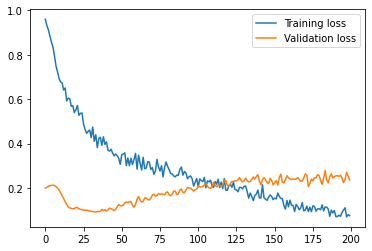

In [ ]:
plt.plot(historyN.history['loss'], label='Training loss')
plt.plot(historyN.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionN = modelN.predict(trainX[:12])

1/1 [==============================] - 0s 255ms/step


In [ ]:
prediction_copiesN = np.repeat(predictionN, df_for_training.shape[1], axis=-1)
y_pred_futureN = scaler.inverse_transform(prediction_copiesN)[:,1]

In [ ]:
df_forecastN = pd.DataFrame({'Date':np.array(forecast_dates), 'NOx':y_pred_futureN})
df_forecastN['Date']=pd.to_datetime(df_forecastN['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='NOx'>

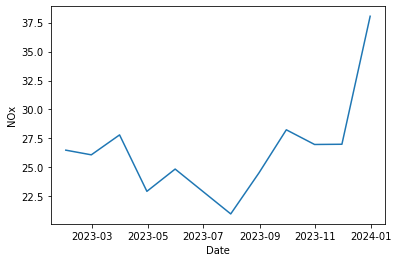

In [ ]:
sns.lineplot(df_forecastN['Date'], df_forecastN['NOx'])

In [ ]:
df_forecastN

,Date,NOx
0,2023-01-31,26.481180
1,2023-02-28,26.077465
2,2023-03-31,27.799147
3,2023-04-30,22.922800
4,2023-05-31,24.846720
5,2023-06-30,22.940727
6,2023-07-31,20.971611
7,2023-08-31,24.518814
8,2023-09-30,28.240198
9,2023-10-31,26.971870


In [ ]:
modelS = Sequential()
modelS.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
modelS.add(LSTM(32, activation='relu', return_sequences=False))
modelS.add(Dropout(0.2))
modelS.add(Dense(trainYS.shape[1]))

In [ ]:
modelS.compile(optimizer='adam', loss='mse')
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyS = modelS.fit(trainX, trainYS, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/200
4/4 [==============================] - 3s 129ms/step - loss: 1.3094 - val_loss: 0.0469
Epoch 2/200
4/4 [==============================] - 0s 29ms/step - loss: 1.3071 - val_loss: 0.0494
Epoch 3/200
4/4 [==============================] - 0s 38ms/step - loss: 1.3044 - val_loss: 0.0525
Epoch 4/200
4/4 [==============================] - 0s 44ms/step - loss: 1.3008 - val_loss: 0.0554
Epoch 5/200
4/4 [==============================] - 0s 43ms/step - loss: 1.2877 - val_loss: 0.0578
Epoch 6/200
4/4 [==============================] - 0s 49ms/step - loss: 1.2874 - val_loss: 0.0599
Epoch 7/200
4/4 [==============================] - 0s 43ms/step - loss: 1.2817 - val_loss: 0.0619
Epoch 8/200
4/4 [==============================] - 0s 50ms/step - loss: 1.2764 - val_loss: 0.0649
Epoch 9/200
4/4 [==============================] - 0s 49ms/step - loss: 1.2762 - val_loss: 0.0676
Epoch 10/200
4/4 [==============================] - 0s 50ms/step - loss: 1.2713 - val_loss: 0.0709
Epoch 11/200
4/4 [

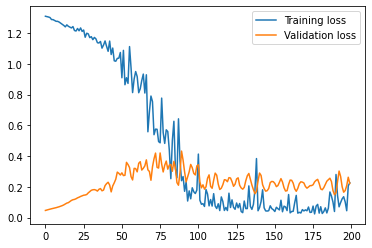

In [ ]:
plt.plot(historyS.history['loss'], label='Training loss')
plt.plot(historyS.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictionS = modelS.predict(trainX[:12])

1/1 [==============================] - 1s 571ms/step


In [ ]:
prediction_copiesS = np.repeat(predictionS, df_for_training.shape[1], axis=-1)
y_pred_futureS = scaler.inverse_transform(prediction_copiesS)[:,2]

In [ ]:
df_forecastS = pd.DataFrame({'Date':np.array(forecast_dates), 'SO2':y_pred_futureS})
df_forecastS['Date']=pd.to_datetime(df_forecastS['Date'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='SO2'>

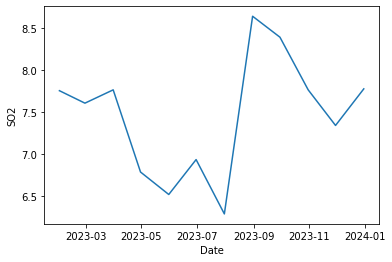

In [ ]:
sns.lineplot(df_forecastS['Date'], df_forecastS['SO2'])

In [ ]:
df_forecastS

,Date,SO2
0,2023-01-31,7.753016
1,2023-02-28,7.604988
2,2023-03-31,7.763003
3,2023-04-30,6.787696
4,2023-05-31,6.521073
5,2023-06-30,6.935327
6,2023-07-31,6.290461
7,2023-08-31,8.636522
8,2023-09-30,8.387846
9,2023-10-31,7.762737


In [ ]:
frames = [df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]]

In [ ]:
result = pd.concat([df_forecastP, df_forecastN[['NOx']], df_forecastS[['SO2']]], axis=1)

In [ ]:
result

,Date,PM10,NOx,SO2
0,2023-01-31,71.278244,26.481180,7.753016
1,2023-02-28,67.584091,26.077465,7.604988
2,2023-03-31,72.272446,27.799147,7.763003
3,2023-04-30,61.150230,22.922800,6.787696
4,2023-05-31,42.423008,24.846720,6.521073
5,2023-06-30,57.403473,22.940727,6.935327
6,2023-07-31,55.947762,20.971611,6.290461
7,2023-08-31,65.481529,24.518814,8.636522
8,2023-09-30,78.623306,28.240198,8.387846
9,2023-10-31,81.770081,26.971870,7.762737


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/LSTM Warangal AQI.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  result.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
